<a href="https://colab.research.google.com/github/Gokul-2/ds_project/blob/main/chennai_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data

In [171]:
# Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
pd.pandas.set_option('display.max_columns',None)

In [155]:
# Get Data in Dataframe
df = pd.read_csv('/content/train-chennai-sale .csv')

In [156]:
# head() shows the first 5 rows of the data
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [12]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [10]:
df.shape # This Dataset contains 7109 rows and 22 columns

(7109, 22)

In [11]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [26]:
#Now we can Drop some unwanted columns
df.drop(columns=['PRT_ID','COMMIS','REG_FEE'],inplace=True)

In [25]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [10]:
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ca392c890>,
      dtype=object)

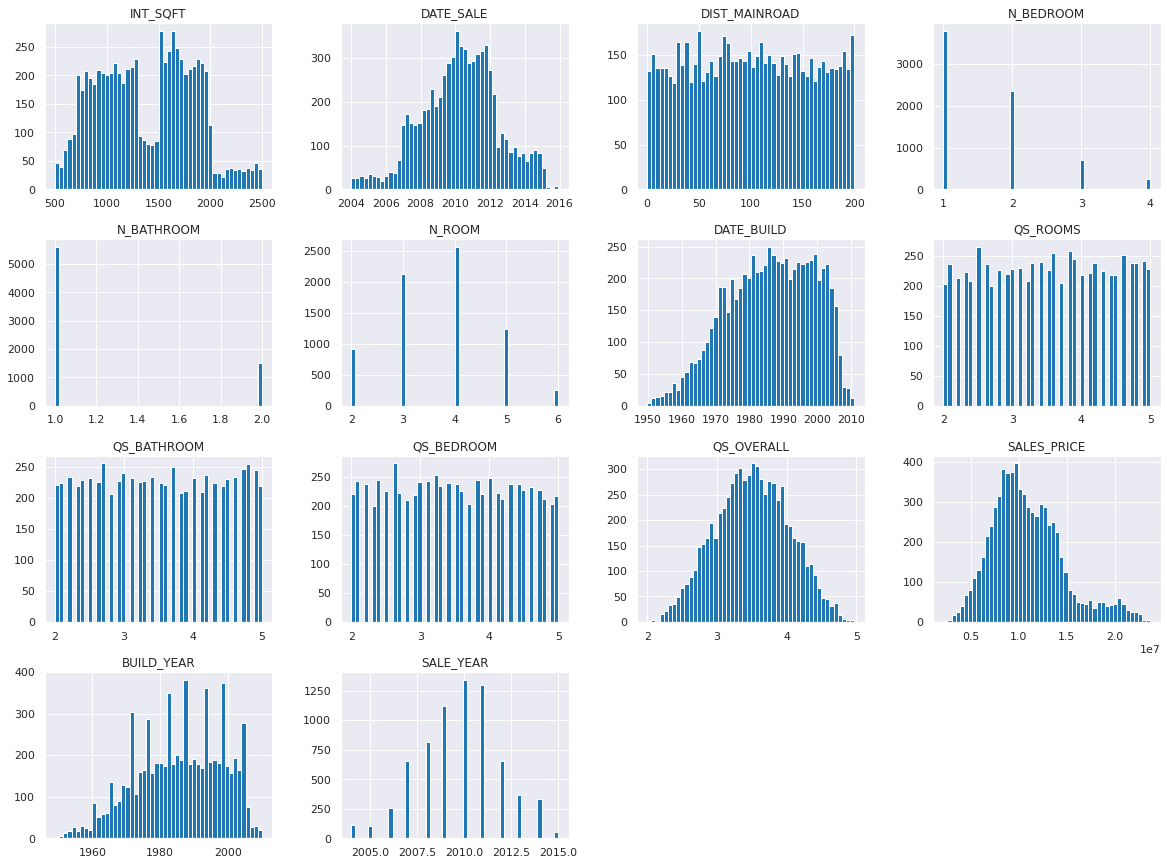

In [129]:
df.hist(bins = 50, figsize=(20,15))

Lets check for NaN (null) values in the dataset

In [17]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

N_BEDROOM have 1 missing values,N_BATHROOM have 5 and QS_OVERALL have 48

In [18]:
# N_BEDROOM
df.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [19]:
df['N_BEDROOM'] = df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])

In [21]:
df.N_BEDROOM.value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [22]:
#N_BATHROOM
df.N_BATHROOM.value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [23]:
df['N_BATHROOM'] = df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])

In [24]:
df.N_BATHROOM.value_counts()

1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

In [25]:
#QS_OVERALL
df.QS_OVERALL.value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

In [26]:
df['QS_OVERALL'] = df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

In [27]:
# cross checking Nullvalues 
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

Checking spelling mistakes in Dataset

In [28]:
#AREA
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [29]:
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

Chrompet

In [30]:
df['AREA']= df['AREA'].str.replace('Chrmpet','chrompet', case = False)

In [31]:
df['AREA']= df['AREA'].str.replace('Chrompt','chrompet', case = False)

In [32]:
df['AREA']= df['AREA'].str.replace('Chormpet','chrompet', case = False)

In [43]:
df['AREA']= df['AREA'].str.replace('chrompet','chrompet', case = False)

Karapakkam

In [33]:
df['AREA']= df['AREA'].str.replace('Karapakam','Karapakkam', case = False)

KK Nagar

In [39]:
df['AREA']= df['AREA'].str.replace('KKNagar','KK Nagar', case = False)

Velachery

In [34]:
df['AREA']= df['AREA'].str.replace('Velchery','Velachery', case = False)

Anna Nagar

In [35]:
df['AREA']= df['AREA'].str.replace('Ana Nagar','Anna Nagar', case = False)

In [41]:
df['AREA']= df['AREA'].str.replace('Ann Nagar','Anna Nagar', case = False)

Adyar  

In [37]:
df['AREA']= df['AREA'].str.replace('Adyr','Adyar', case = False)

T Nagar 

In [45]:
df['AREA']= df['AREA'].str.replace('TNagar','T Nagar', case = False)

In [46]:
df.AREA.value_counts()

chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

Text(0.5, 1.0, 'AREA')

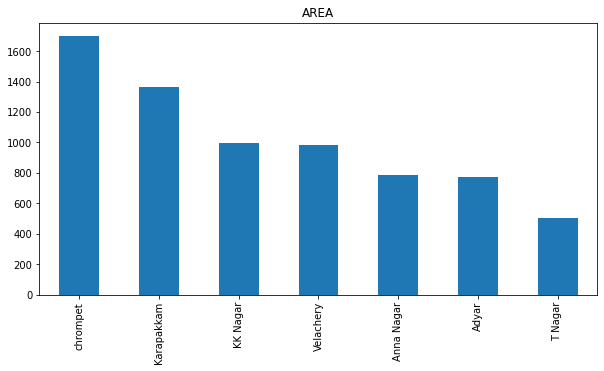

In [49]:
plt.figure(figsize=(10,5))
df['AREA'].value_counts().plot(kind='bar');
plt.title('AREA')

,SALES_PRICE
SALES_PRICE,1.0


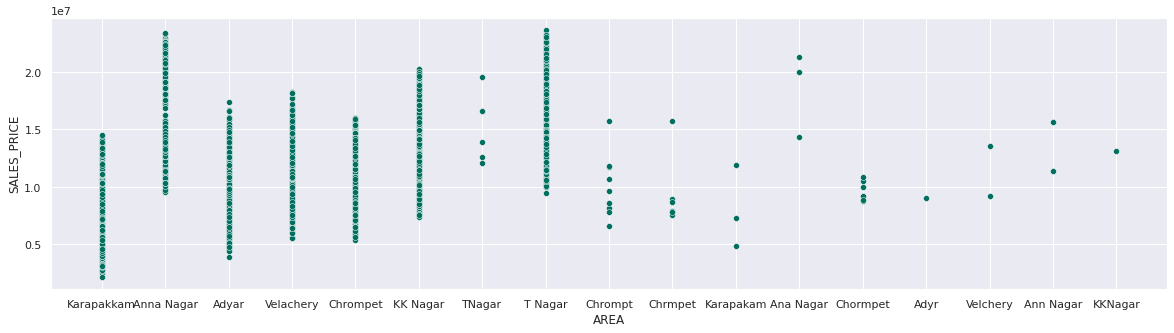

In [228]:
# AREA vs SALES_PRICE
plt.figure(figsize=(20,5))
sns.scatterplot(x="AREA", y="SALES_PRICE",data=df, palette="spectral")
df[["AREA","SALES_PRICE"]].corr()



*   we can see most of houses are in chrompet followed by karapakkam and KK nagar
*   Tnagar has the low number of buildings


*   we can see strong linear relationship between SALES_PRICE and AREA





***INT_SQFT***

In [11]:
df.INT_SQFT.value_counts()

1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


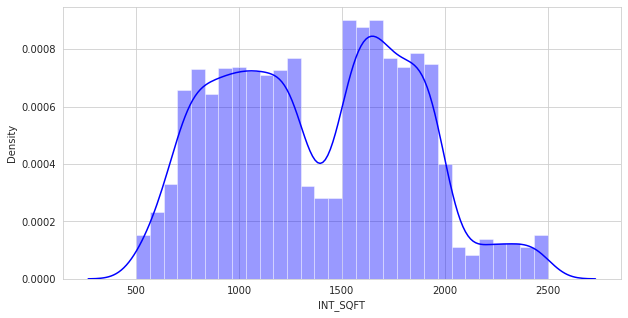

In [32]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.distplot(df['INT_SQFT'], kde =True, color= 'Blue', bins = 30)

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


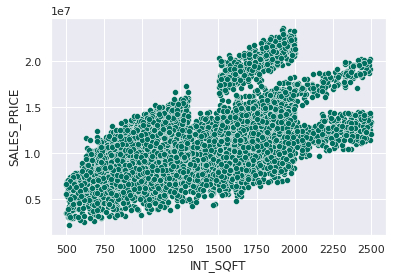

In [212]:
#INT_SQFT vs SALES_PRICE
sns.scatterplot(x="INT_SQFT", y="SALES_PRICE",data=df, palette="spectral")
df[["INT_SQFT","SALES_PRICE"]].corr()

Ploting the realation between INT_SQFT and SALES_PRICE

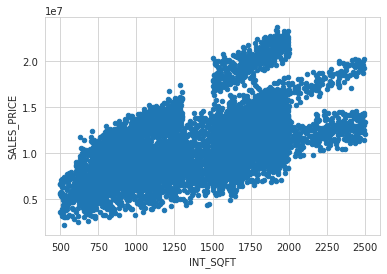

In [33]:

df.plot.scatter(x = "INT_SQFT", y = "SALES_PRICE")

Finding age of house by DATE_SALE and DATE_BUILD

In [67]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df['HOUSE_AGE'] =df['DATE_SALE'] - df["DATE_BUILD"]

In [71]:
df = df.drop(['DATE_SALE'],['DATE_BUILD']),axis=1)

SyntaxError: ignored

In [54]:
#Correlation between 
df[['INT_SQFT','SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


Text(0.5, 1.0, 'finding is there an order in INT_SQFT vs SALES_PRICE')

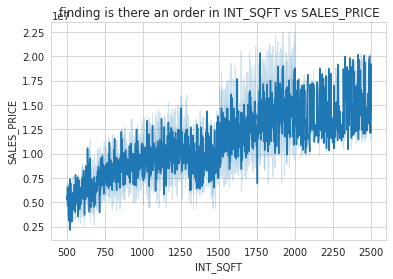

In [57]:
sns.lineplot(x=df['INT_SQFT'],y=df['SALES_PRICE'])
plt.title('finding is there an order in INT_SQFT vs SALES_PRICE')

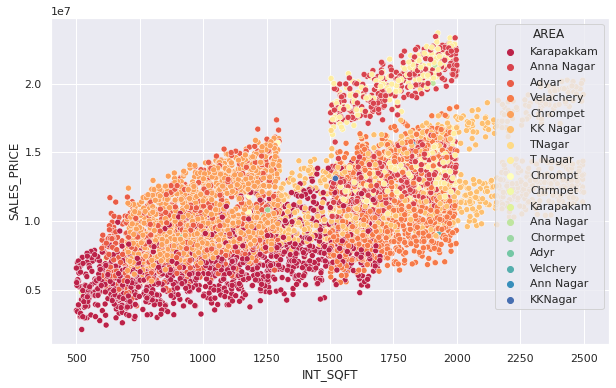

In [161]:

#sales price vs INT_SQFT for each AREA
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid",palette="Spectral")
sns.scatterplot(x=df['INT_SQFT'],y=df.SALES_PRICE,hue=df.AREA,palette="Spectral")




*   Anna Nagar and Tnagar has the highest sales price for 1500 to 2000 sqft feet hours
*   Overall can we see for each and every area sales price increases with an increases with an increase in sqft



DIST_MAINROAD 

In [72]:
df.DIST_MAINROAD.unique()

array([131,  26,  70,  14,  84,  36, 137, 176, 175,  74,  78, 143,  83,
       157, 148, 134,  69, 168,  53,  96, 114, 100, 111, 105,  29,  59,
       185, 138, 173,  15, 117,  16, 130,  46, 180,  52,  86,  49, 113,
       189,  28,  51,  19, 167, 126,  75, 154,  25, 187, 200,  32,  11,
        23,  13,  58,  89,  48,  39, 177, 116,  41, 192,  72,  24,  43,
        85, 171, 149,  73,  62, 145, 125, 121, 129,   6, 103,   8,  50,
        67,   0, 147,  71,  34, 178, 106, 144, 135,  38,  40, 142,  79,
        20,  99, 166,  63,  44,  60,  90, 169,  10, 122, 108,  98,  57,
       104,  17,   1, 109, 164, 136,  97,  37,   9, 181,  93,  81, 193,
        95, 196, 141, 158, 174,  94, 124,  82,  76, 190, 194,  54,  64,
        65, 153, 115, 102,  77, 182, 163,  88,  66, 119,  18, 188, 112,
       120, 159,   4, 123,  31,   2, 156, 184, 170, 110,   7, 152,  27,
       198, 183,  12,  45, 161,  30, 118,  33,  61, 191, 160, 140,  47,
       146, 128,  80,  55, 151,   3,  92,  22,  35, 101, 127, 19



*   DIST_MAINROAD feature is showing uniform distribution



Text(0.5, 1.0, 'Distance from mainroad vs Sales price')

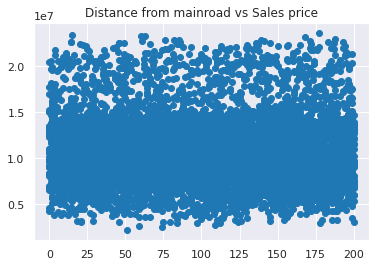

In [77]:
plt.scatter(df.DIST_MAINROAD,df.SALES_PRICE)
plt.title("Distance from mainroad vs Sales price")



* There is no correlation between DIST_MAINROAD and SALES_PRICE that we can see am transfering the DIST_MAINROAD feature and checking for linear relation



,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


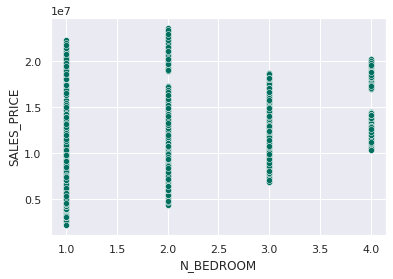

In [229]:
#DIST_MAINROAD vs SALES_PRICE
sns.scatterplot(x="N_BEDROOM", y="SALES_PRICE",data=df, palette="spectral")
df[["DIST_MAINROAD","SALES_PRICE"]].corr()

N_BEDROOM

In [78]:
df.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

<function seaborn.utils.despine>

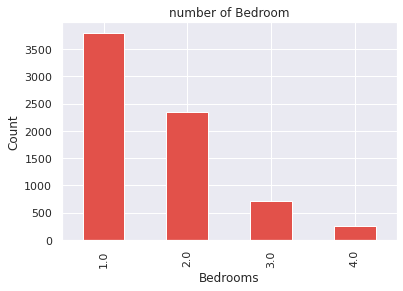

In [170]:
df['N_BEDROOM'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.330999
SALES_PRICE,0.330999,1.000000


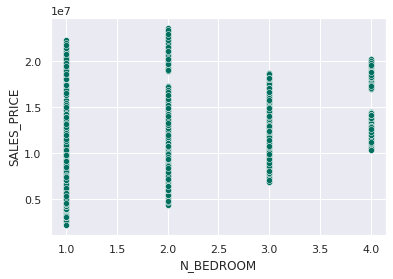

In [211]:
#N_BEDROOM vs SALES_PRICE
sns.scatterplot(x="N_BEDROOM", y="SALES_PRICE",data=df, palette="spectral")
df[["N_BEDROOM","SALES_PRICE"]].corr()

N_BATHROOM

In [82]:
df.N_BATHROOM.value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

Text(0.5, 1.0, 'N_BATHROOM')

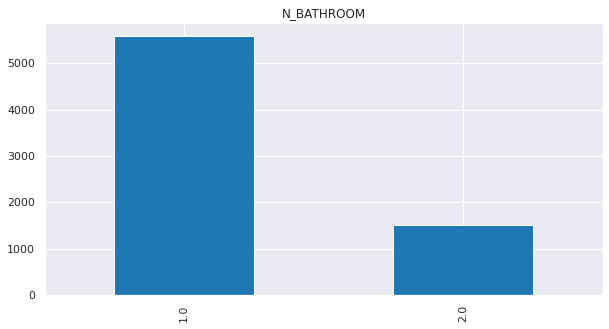

In [84]:
plt.figure(figsize=(10,5))
df['N_BATHROOM'].value_counts().plot(kind='bar');
plt.title('N_BATHROOM')

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.108884
SALES_PRICE,0.108884,1.000000


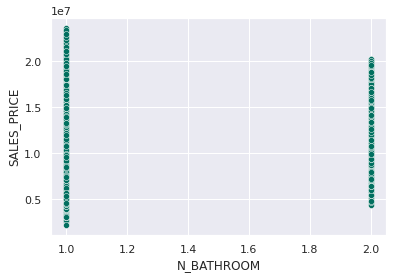

In [210]:
#N_BATHROOM vs SALES_PRICE
sns.scatterplot(x="N_BATHROOM", y="SALES_PRICE",data=df, palette="spectral")
df[["N_BATHROOM","SALES_PRICE"]].corr()



*   Chrompet,Tnagar and Anna Nagar has no building which consists of two bathrooms



N_ROOM 

In [85]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

Text(0.5, 1.0, 'N_ROOM')

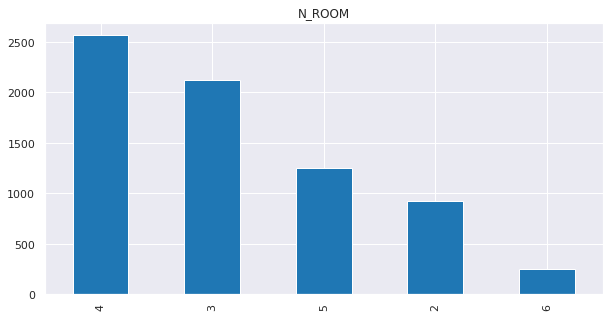

In [86]:
plt.figure(figsize=(10,5))
df['N_ROOM'].value_counts().plot(kind='bar');
plt.title('N_ROOM')

SALE_COND

In [87]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [88]:
df['SALE_COND']= df['SALE_COND'].str.replace('Adj Land','AdjLand', case = False)

In [89]:
df['SALE_COND']= df['SALE_COND'].str.replace('AdjLand','AdjLand', case = False)

In [90]:
df['SALE_COND']= df['SALE_COND'].str.replace('PartiaLl','Partial', case = False)

In [91]:
df['SALE_COND']= df['SALE_COND'].str.replace('Partiall','Partial', case = False)

In [92]:
df['SALE_COND']= df['SALE_COND'].str.replace('Ab Normal','AbNormal', case = False)

In [94]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

Text(0.5, 1.0, 'SALE_COND')

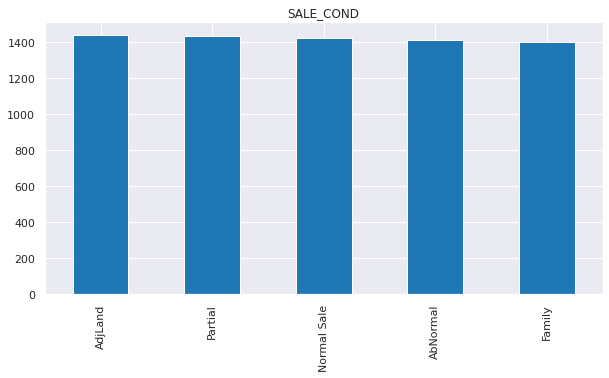

In [121]:
plt.figure(figsize=(10,5))
df['SALE_COND'].value_counts().plot(kind='bar');
plt.title('SALE_COND')

,SALES_PRICE
SALES_PRICE,1.0


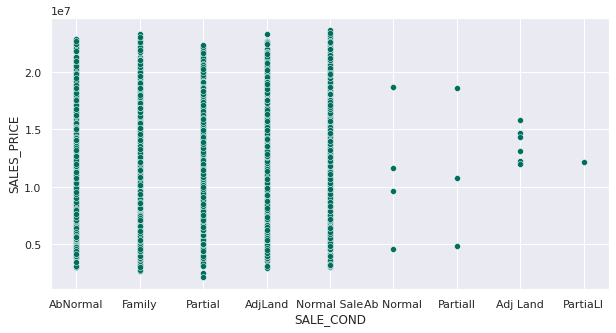

In [214]:
#SALE_COND vs SALES_PRICE
plt.figure(figsize=(10,5))
sns.scatterplot(x="SALE_COND", y="SALES_PRICE",data=df, palette="spectral")
df[["SALE_COND","SALES_PRICE"]].corr()

PARK_FACIL

In [95]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [217]:
df['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)
df.PARK_FACIL.value_counts

<bound method IndexOpsMixin.value_counts of 0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
7104     No
7105    Yes
7106     No
7107    Yes
7108    Yes
Name: PARK_FACIL, Length: 7109, dtype: object>

,SALES_PRICE
SALES_PRICE,1.0


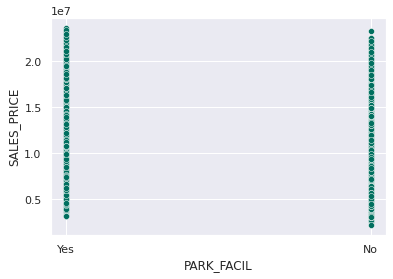

In [218]:
#PARK_FACIL vs SALES_PRICE
sns.scatterplot(x="PARK_FACIL", y="SALES_PRICE",data=df, palette="spectral")
df[["PARK_FACIL","SALES_PRICE"]].corr()

BUILDTYPE


In [98]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [104]:
df['BUILDTYPE']= df['BUILDTYPE'].str.replace('Comercial','Commercial', case = False)

In [103]:
df['BUILDTYPE']= df['BUILDTYPE'].str.replace('Other','others', case = False)

In [106]:
df['BUILDTYPE']= df['BUILDTYPE'].str.replace('othersss','others', case = False)

In [108]:
df['BUILDTYPE']= df['BUILDTYPE'].str.replace('otherss ','others', case = False)

In [109]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2329
others        2310
otherss         26
Name: BUILDTYPE, dtype: int64

Text(0.5, 1.0, 'BUILDTYPE')

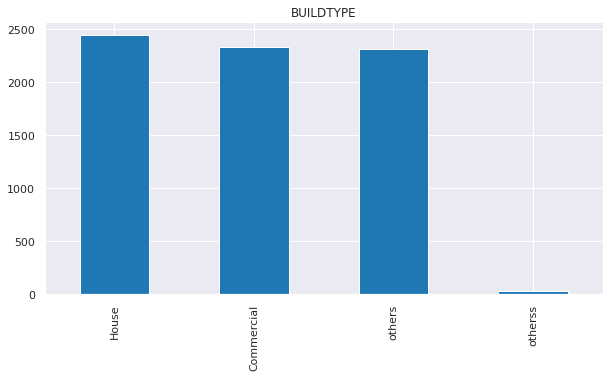

In [122]:
plt.figure(figsize=(10,5))
df['BUILDTYPE'].value_counts().plot(kind='bar');
plt.title('BUILDTYPE')

,SALES_PRICE
SALES_PRICE,1.0


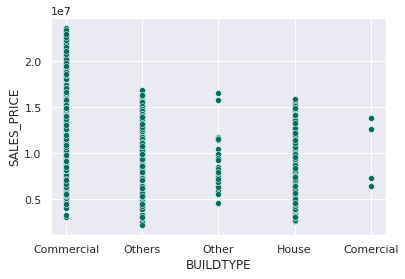

In [219]:
#BUILDTYPE vs SALES_PRICE
sns.scatterplot(x="BUILDTYPE", y="SALES_PRICE",data=df, palette="spectral")
df[["BUILDTYPE","SALES_PRICE"]].corr()

UTILITY_AVAIL

In [110]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [111]:
df['UTILITY_AVAIL']= df['UTILITY_AVAIL'].str.replace('All Pub','AllPub', case = False)

In [112]:
df['UTILITY_AVAIL']= df['UTILITY_AVAIL'].str.replace('NoSewr','NoSeWa', case = False)

In [113]:
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSeWa     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [115]:
mapper ={"Noswe":"Nosewa"}
for k, v in mapper.items():
  df.loc[df['UTILITY_AVAIL'].str.contains(k),'UTILITY_AVAIL']=v

In [116]:
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSeWa     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

Text(0.5, 1.0, 'UTILITY_AVAIL')

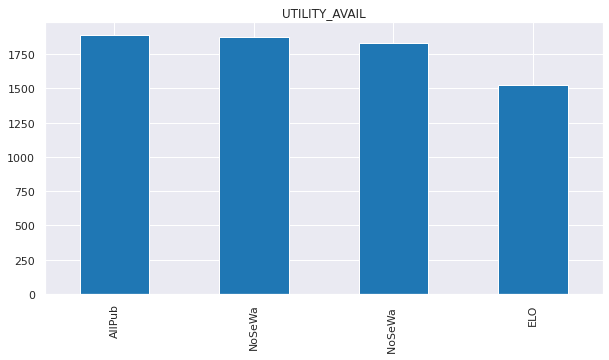

In [123]:
plt.figure(figsize=(10,5))
df['UTILITY_AVAIL'].value_counts().plot(kind='bar');
plt.title('UTILITY_AVAIL')

,SALES_PRICE
SALES_PRICE,1.0


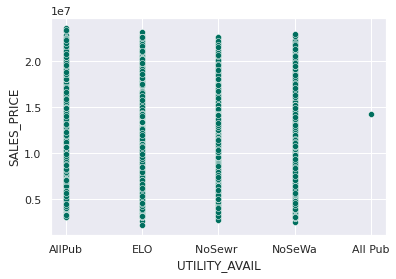

In [220]:
#UTILITY_AVAIL vs SALES_PRICE
sns.scatterplot(x="UTILITY_AVAIL", y="SALES_PRICE",data=df, palette="spectral")
df[["UTILITY_AVAIL","SALES_PRICE"]].corr()

STREET

In [117]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [118]:
df['STREET']= df['STREET'].str.replace('Pavd','Paved', case = False)

In [119]:
df['STREET']= df['STREET'].str.replace('NoAccess','No Access', case = False)

In [120]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

Text(0.5, 1.0, 'STREET')

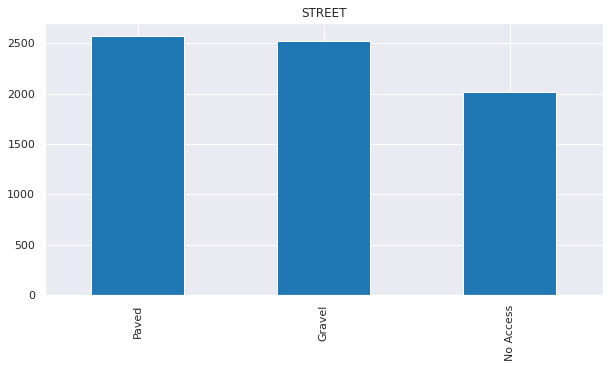

In [124]:
plt.figure(figsize=(10,5))
df['STREET'].value_counts().plot(kind='bar');
plt.title('STREET')

,SALES_PRICE
SALES_PRICE,1.0


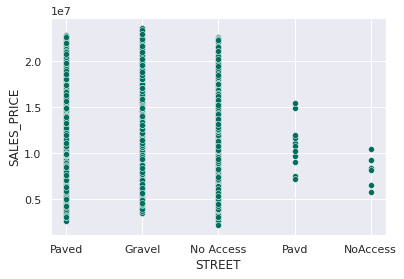

In [221]:
#STREET vs SALES_PRICE
sns.scatterplot(x="STREET", y="SALES_PRICE",data=df, palette="spectral")
df[["STREET","SALES_PRICE"]].corr()

MZZONE

In [125]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

Text(0.5, 1.0, 'No of BUILDINGS (MZZONE WISE)')

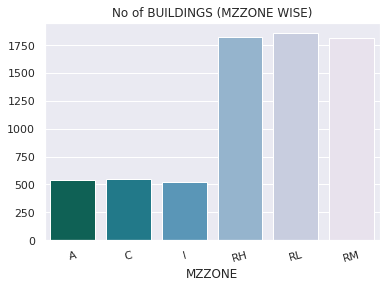

In [226]:
A=df['BUILDTYPE'].groupby(df['MZZONE']).count()
sns.barplot(x=A.index,y=A.values,data=df)
plt.xticks(rotation=15)
plt.title('No of BUILDINGS (MZZONE WISE)')

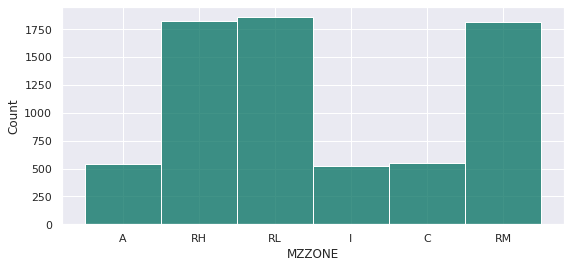

In [189]:
sns.set_theme(style='darkgrid',palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.histplot(df['MZZONE'],bins=25)

,SALES_PRICE
SALES_PRICE,1.0


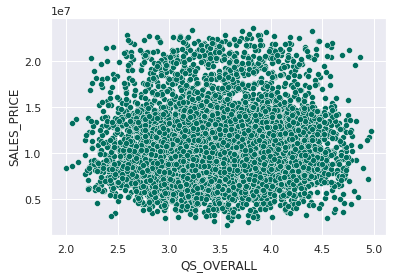

In [190]:
#MZZONE vs SALES_PRICE
sns.scatterplot(x="QS_OVERALL", y="SALES_PRICE",data=df, palette="spectral")
df[["MZZONE","SALES_PRICE"]].corr()

In [148]:
df.SALES_PRICE.value_counts()

5378000     2
9429000     2
4971250     2
4546625     2
11930880    2
           ..
6928000     1
14874950    1
9304770     1
6980320     1
9976480     1
Name: SALES_PRICE, Length: 7057, dtype: int64

QS_ROOMS

In [182]:
df.QS_ROOMS.value_counts()

2.5    265
3.8    259
3.6    255
4.6    252
3.9    245
4.9    242
3.4    240
4.7    239
3.3    239
4.8    239
4.2    239
2.6    237
2.1    236
3.1    230
5.0    228
3.0    228
3.5    227
2.8    226
4.3    225
2.3    224
4.1    222
2.9    220
4.4    219
4.5    218
4.0    218
2.2    213
2.4    208
3.2    208
3.7    205
2.0    203
2.7    200
Name: QS_ROOMS, dtype: int64

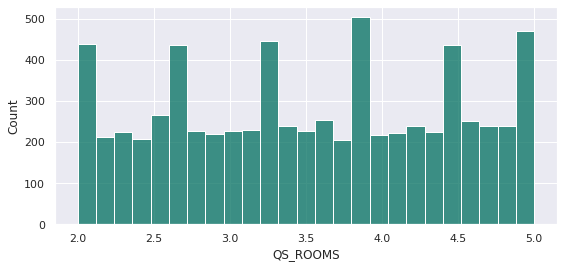

In [181]:
sns.set_theme(style='darkgrid',palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.histplot(df['QS_ROOMS'],bins=25)

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021967
SALES_PRICE,0.021967,1.000000


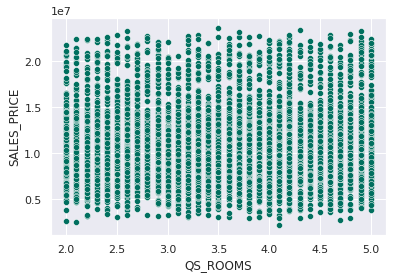

In [192]:
#QS_ROOMS vs SALES_PRICE
sns.scatterplot(x="QS_ROOMS", y="SALES_PRICE",data=df, palette="spectral")
df[["QS_ROOMS","SALES_PRICE"]].corr()

QS_BATHROOM

In [194]:
df.QS_BATHROOM.value_counts()

2.7    256
4.8    255
3.7    251
4.7    247
4.9    245
3.0    241
4.2    237
4.6    234
3.4    234
2.2    234
2.5    233
4.0    232
3.1    232
4.5    231
2.4    230
2.9    228
3.3    227
3.2    226
2.6    226
3.5    225
2.1    224
4.3    224
2.0    222
3.6    221
2.3    220
4.4    219
5.0    219
3.9    211
4.1    210
3.8    209
2.8    206
Name: QS_BATHROOM, dtype: int64

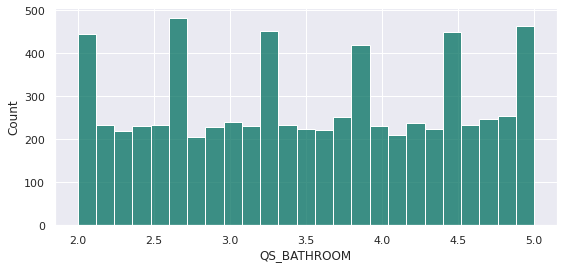

In [195]:
sns.set_theme(style='darkgrid',palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.histplot(df['QS_BATHROOM'],bins=25)

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011377
SALES_PRICE,-0.011377,1.000000


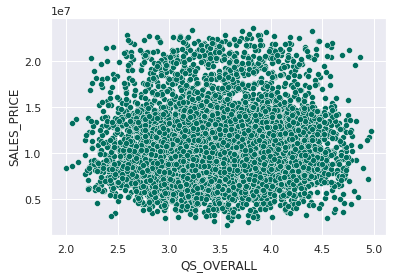

In [196]:
# QS_BATHROOM vs SALES_PRICE
sns.scatterplot(x="QS_OVERALL", y="SALES_PRICE",data=df, palette="spectral")
df[["QS_BATHROOM","SALES_PRICE"]].corr()

QS_BEDROOM

In [197]:
df.QS_BEDROOM.value_counts()

2.6    273
3.2    253
4.0    248
2.4    244
3.8    244
3.1    243
2.1    242
3.0    241
3.4    239
4.3    237
4.4    237
3.5    237
2.2    237
3.3    234
4.6    233
4.7    228
4.5    227
2.5    226
3.6    225
4.1    223
2.7    222
2.0    221
3.9    220
2.9    219
5.0    217
4.2    212
4.8    211
2.8    210
3.7    203
4.9    203
2.3    200
Name: QS_BEDROOM, dtype: int64

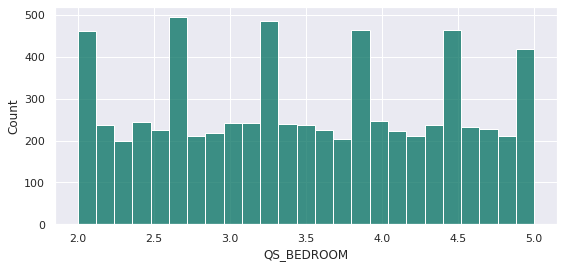

In [198]:
sns.set_theme(style='darkgrid',palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.histplot(df['QS_BEDROOM'],bins=25)

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.018804
SALES_PRICE,0.018804,1.000000


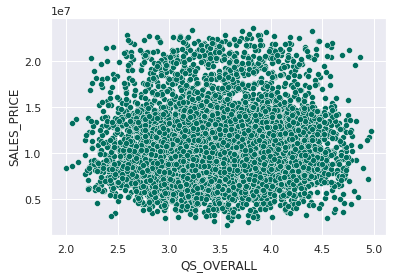

In [199]:
# QS_BEDROOM vs SALES_PRICE
sns.scatterplot(x="QS_OVERALL", y="SALES_PRICE",data=df, palette="spectral")
df[["QS_BEDROOM","SALES_PRICE"]].corr()

 QS_OVERALL

In [200]:
df.QS_OVERALL.value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

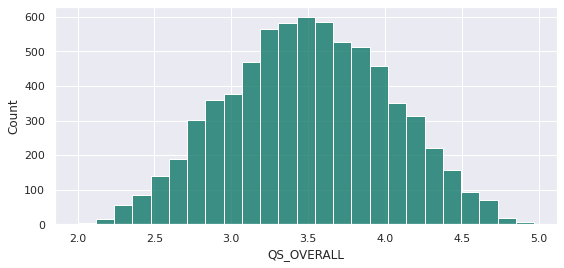

In [201]:
sns.set_theme(style='darkgrid',palette="PuBuGn_r")
plt.figure(figsize=(9,4))
sns.histplot(df['QS_OVERALL'],bins=25)

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020556
SALES_PRICE,0.020556,1.000000


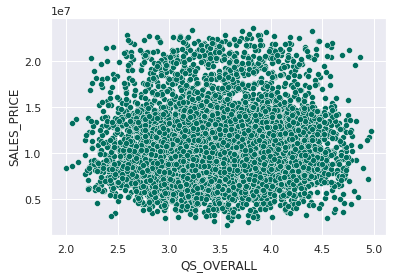

In [202]:
# QS_BEDROOM vs SALES_PRICE
sns.scatterplot(x="QS_OVERALL", y="SALES_PRICE",data=df, palette="spectral")
df[["QS_OVERALL","SALES_PRICE"]].corr()

In [233]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000
